In [1]:
import matplotlib.pyplot as plt
from geometry_tools.drawtools import HyperbolicDrawing

from geometry_tools import hyperbolic, representation, utils
from geometry_tools.hyperbolic import Model
from geometry_tools.automata import fsa

from geometry_tools import coxeter

import pdb

import numpy as np

from matplotlib.path import Path
from matplotlib.patches import Circle, Arc, PathPatch
from matplotlib.collections import CircleCollection, EllipseCollection

In [2]:
p1 = hyperbolic.Point((0.4, 0.5), model="klein")
p2 = hyperbolic.Point((0.6, -0.7), model="klein")
p3 = hyperbolic.Point((0.2, 0.1), model="klein")

In [3]:
poly = hyperbolic.Polygon([p1, p2, p3])

iso = hyperbolic.sl2r_iso(np.array([[1., 1.], [0., 1.]]))

rot = hyperbolic.Isometry.standard_rotation(np.pi / 4)

rep = hyperbolic.HyperbolicRepresentation()
rep["a"] = iso

polys = rep.isometries(["", "a", "aa", "A", "AA"]) @ poly

g2poly = hyperbolic.Polygon.regular_surface_polygon(12)
octagon = hyperbolic.Polygon(g2poly)

pent_radius = hyperbolic.regular_polygon_radius(5, np.pi/2)
pentagon = hyperbolic.Polygon.regular_polygon(5, pent_radius)

rotated_pent = rot @ pentagon

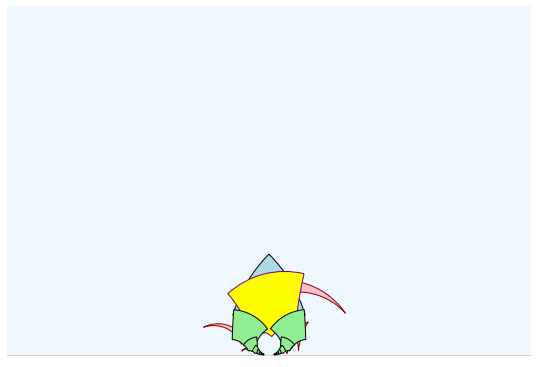

In [4]:
planefig = HyperbolicDrawing(model="halfplane")
planefig.draw_plane()

planefig.draw_polygon(polys, facecolor="pink", edgecolor="darkred")
planefig.draw_polygon(pentagon, facecolor="lightblue")

planefig.draw_polygon(rotated_pent, facecolor="yellow", edgecolor="purple")

planefig.draw_polygon(rep.isometries(["a" * i for i in range(1, 9)] + ["A" * i for i in range(1, 9)]) @ pentagon,
                     facecolor="lightgreen")

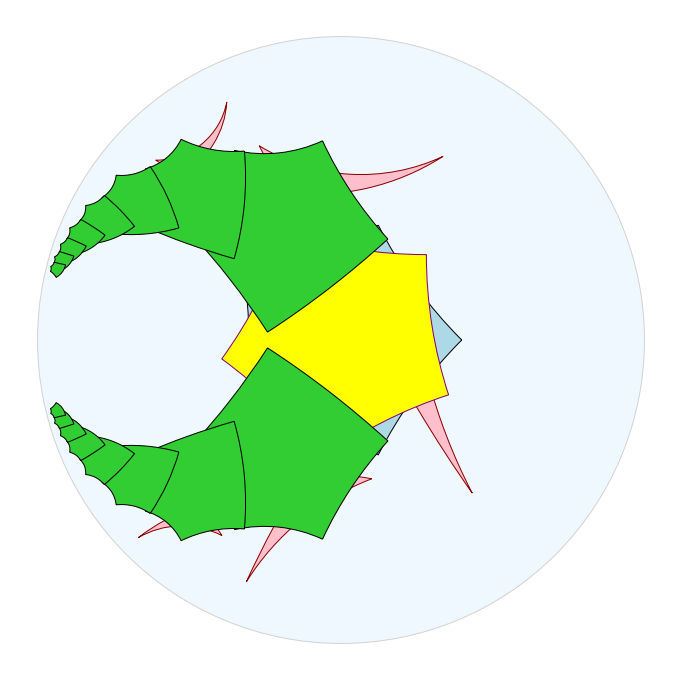

In [5]:
planefig = HyperbolicDrawing(figsize=10, model="poincare")
planefig.draw_plane()

planefig.draw_polygon(polys, facecolor="pink", edgecolor="darkred")
planefig.draw_polygon(pentagon, facecolor="lightblue")

planefig.draw_polygon(rotated_pent, facecolor="yellow", edgecolor="purple")

planefig.draw_polygon(rep.isometries(["a" * i for i in range(1, 9)] + ["A" * i for i in range(1, 9)]) @ pentagon,
                     facecolor="limegreen")

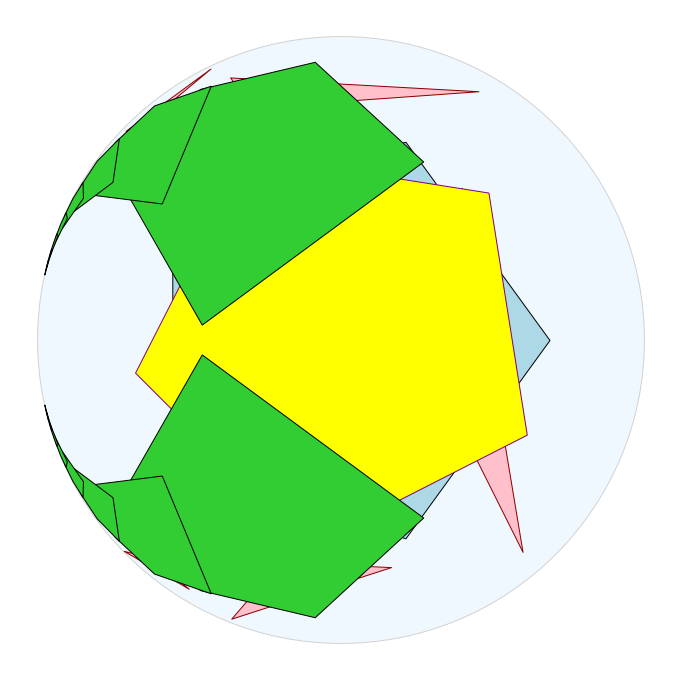

In [6]:
planefig = HyperbolicDrawing(figsize=10, model="klein")
planefig.draw_plane()

planefig.draw_polygon(polys, facecolor="pink", edgecolor="darkred")
planefig.draw_polygon(pentagon, facecolor="lightblue")

planefig.draw_polygon(rotated_pent, facecolor="yellow", edgecolor="purple")

planefig.draw_polygon(rep.isometries(["a" * i for i in range(1, 9)] + ["A" * i for i in range(1, 9)]) @ pentagon,
                     facecolor="limegreen")

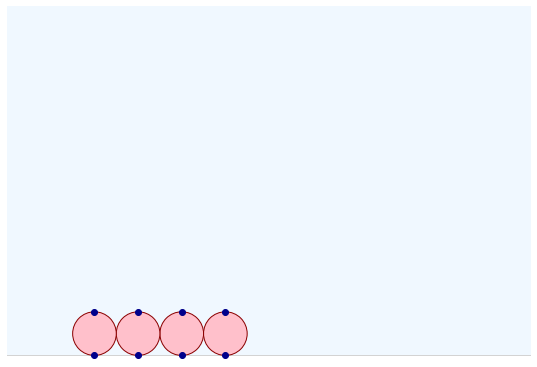

In [7]:
tr = hyperbolic.sl2r_iso([[1., 0.], [1., 1.]])
trep = hyperbolic.HyperbolicRepresentation()
trep["a"] = tr
ref = hyperbolic.Point.get_origin(2)
h_ctr = hyperbolic.IdealPoint.from_angle(np.pi)

horosphere =  hyperbolic.Horosphere(h_ctr, ref)
to_plot = hyperbolic.Point([h_ctr, ref])

planefig = HyperbolicDrawing(model="halfspace")
planefig.draw_plane()

pts = trep.isometries(["a", "aa", "aaa", "aaaa"]).apply(to_plot, broadcast="pairwise")
hsphs = trep.isometries(["a", "aa", "aaa", "aaaa"]) @ horosphere

planefig.draw_horosphere(hsphs, facecolor="pink", edgecolor="darkred")
planefig.draw_point(pts, color="darkblue")

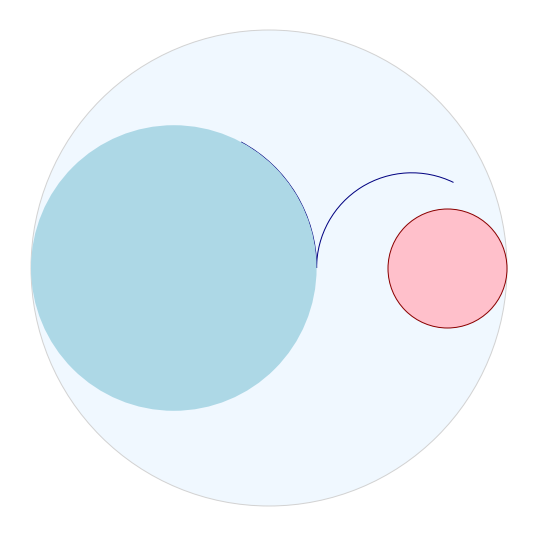

In [8]:
inf = hyperbolic.IdealPoint.from_angle(SR(0))
hctr = hyperbolic.IdealPoint.from_angle(pi)
ctr = hyperbolic.Point([0., 1.5], model="halfspace").change_base_ring(QQ)
ctr2 = hyperbolic.Point([0., 3.0], model="halfspace").change_base_ring(QQ)

inf_iso = hyperbolic.sl2r_iso([[1., 0.], [4., 1.]]).change_base_ring(QQ)
zer_iso = hyperbolic.sl2r_iso([[1., 1.], [0., 1.]]).change_base_ring(QQ)

horo = hyperbolic.Horosphere(hctr, ctr)
horoarc = hyperbolic.HorosphereArc(hctr, zer_iso @ ctr, ctr)
flat_arc = hyperbolic.HorosphereArc(inf, ctr, inf_iso @ ctr)
infhsph = hyperbolic.Horosphere(inf, ctr2)

fig = HyperbolicDrawing(model="poincare")
fig.draw_plane()

fig.draw_horoarc(horoarc, linewidth=1, edgecolor="navy")
fig.draw_horoarc(flat_arc, linewidth=1, edgecolor="navy")
fig.draw_horosphere(horo, edgecolor="none", facecolor="lightblue")
fig.draw_horosphere(infhsph, facecolor="pink", edgecolor="darkred")

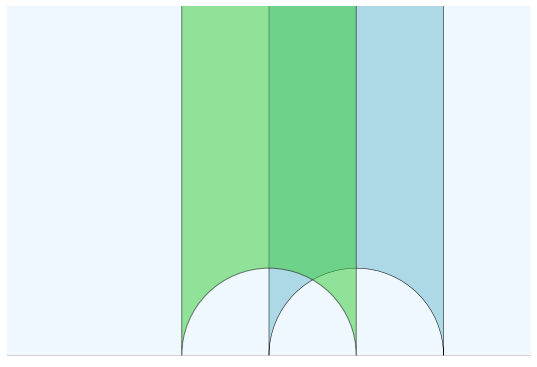

In [9]:
ctr = hyperbolic.Point((0., 0.), model="klein")
bdry_pt = hyperbolic.IdealPoint.from_angle(0.0r)
opp_pt = hyperbolic.IdealPoint.from_angle(np.pi)

tr = hyperbolic.sl2r_iso([[1., 0.], [2., 1.]])

v3 = hyperbolic.Point((4., 0.), model="halfplane")

ideal_triangle = hyperbolic.Polygon([v3, bdry_pt, opp_pt])

fig = HyperbolicDrawing(model="halfplane")
fig.draw_plane()
fig.draw_polygon(ideal_triangle, linewidth=0.5, facecolor="lightblue", edgecolor="black")
fig.draw_polygon(tr @ ideal_triangle, facecolor="limegreen", alpha=0.5)

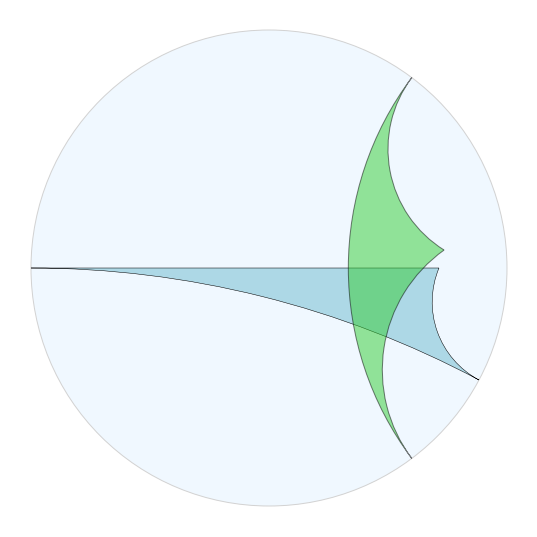

In [10]:
v1 = hyperbolic.Point((0., 0.), model="klein")
v2 = hyperbolic.Point((0., 6.), model="halfplane")
v3 = hyperbolic.IdealPoint.from_angle(np.pi)
v4 = hyperbolic.Point((4., 0.), model="halfplane")

tr = hyperbolic.sl2r_iso([[1., 0.], [2., 1.]])

ideal_triangle = hyperbolic.Polygon([v2, v3, v4])

fig = HyperbolicDrawing(model="poincare")
fig.draw_plane()
fig.draw_polygon(ideal_triangle, linewidth=0.5, facecolor="lightblue", edgecolor="black")
fig.draw_polygon(tr @ ideal_triangle, facecolor="limegreen", alpha=0.5)

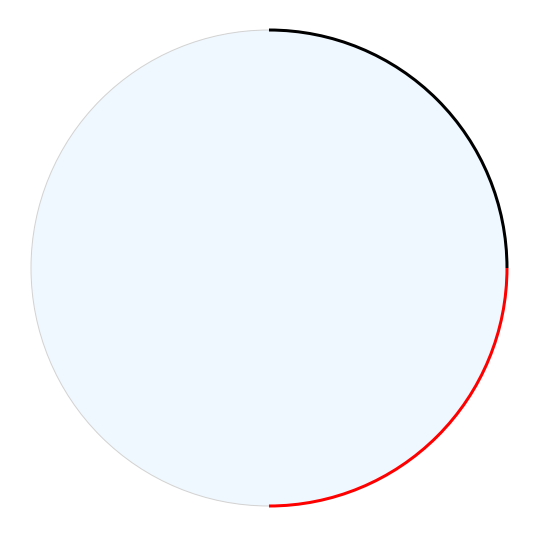

In [11]:
p1 = hyperbolic.IdealPoint.from_angle(0.)
p2 = hyperbolic.IdealPoint.from_angle(np.pi / 2)

arc = hyperbolic.BoundaryArc(p1, p2)

iso = hyperbolic.sl2r_iso([[1., 0.], [0., -1.]])

fig = HyperbolicDrawing(model="klein")
fig.draw_plane()

fig.draw_boundary_arc(arc)

fig.draw_boundary_arc(iso @ arc, edgecolor="red")

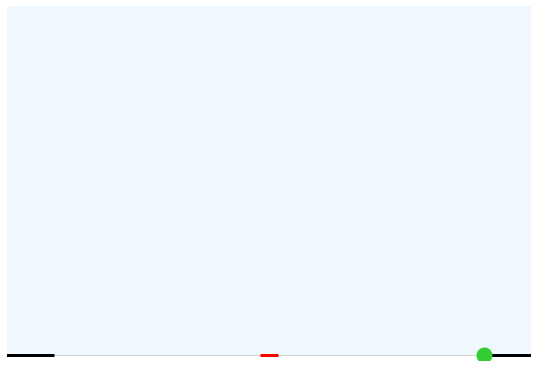

In [12]:
p1 = hyperbolic.IdealPoint.from_angle(0.4r)
p2 = hyperbolic.IdealPoint.from_angle(-0.4, dtype=float)


arc = hyperbolic.BoundaryArc(p2, p1)

rot = hyperbolic.Isometry.standard_rotation(np.pi / 2)
iso = hyperbolic.sl2r_iso([[1., 0.], [0., -1.]])

iso = rot.inv() @ iso @ rot

fig = HyperbolicDrawing(model="halfspace")
fig.draw_plane()

fig.draw_boundary_arc(arc)

fig.draw_boundary_arc(iso @ arc, edgecolor="red")
fig.draw_point(p2, color="limegreen", markersize=15)

In [13]:
pi = np.pi

#get a regular 4g-gon with the right radius for a surface group
octagon = hyperbolic.Polygon.regular_surface_polygon(2)

#apply a rotation by pi/4 to it
rot = hyperbolic.Isometry.standard_rotation(2 * pi / 8)
octagon2 = rot.apply(octagon)

#poincare coordinates of the vertices
x,y = octagon.poincare_coords().T

#get the geodesic segments between the vertices of the original polygon and 
#the vertices of the rotated polygon
segment = hyperbolic.Segment(octagon, octagon2)

#find the unit tangent vectors
forward_tv = octagon.unit_tangent_towards(octagon2)
backward_tv = rot.inv().apply(octagon2.unit_tangent_towards(octagon))

base_segments = [segment[0], segment[1], segment[4], segment[5]]
colors = ["red", "blue", "green", "magenta"]

In [14]:
relation = "bABadCDc"
surface_gp_rep = hyperbolic.HyperbolicRepresentation()

surface_gp_rep["a"] = forward_tv[0].isometry_to(backward_tv[3])
surface_gp_rep["b"] = forward_tv[1].isometry_to(backward_tv[4])
surface_gp_rep["c"] = forward_tv[4].isometry_to(backward_tv[7])
surface_gp_rep["d"] = forward_tv[5].isometry_to(backward_tv[0])

surface_gp_rep[relation]

array([[ 1.00000000e+00,  3.49494496e-13,  1.62355122e-12],
       [ 5.33720527e-12,  1.00000000e+00, -1.76088649e-12],
       [-4.71535543e-12, -4.85419492e-12,  1.00000000e+00]])

In [15]:
basepoint = hyperbolic.Point.get_origin(2)

octagon_aut = fsa.load_kbmag_file("octagon_surf.wa")
elts = surface_gp_rep.automaton_accepted(octagon_aut, 3)

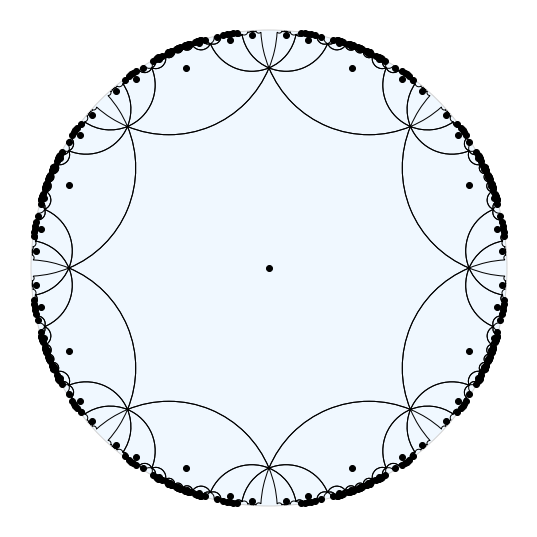

In [16]:
fig = HyperbolicDrawing(model=Model.POINCARE)

fig.draw_plane()
fig.draw_point(elts @ basepoint)
fig.draw_polygon(elts @ octagon)

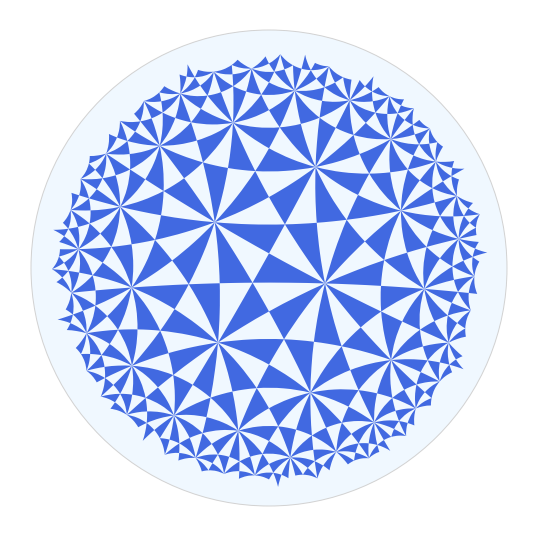

In [17]:
from geometry_tools import hyperbolic, coxeter, drawtools

# make the triangle group representation
triangle_group = coxeter.TriangleGroup((2,3,7))
triangle_rep = triangle_group.hyperbolic_rep(exact=False)

# find a fundamental domain for the action by finding 
# fixed points of length-2 elements
vertices = triangle_rep.isometries(["ab", "bc", "ca"]).fixed_point()
fund_triangle = hyperbolic.Polygon(vertices)

# find all orientation-preserving isometries of length at most 30 using an automaton
triangle_fsa = triangle_group.automaton(even_length=True)
pos_isometries = triangle_rep.automaton_accepted(triangle_fsa, 8)

# draw the translated triangles
fig = drawtools.HyperbolicDrawing(model="poincare")
fig.draw_plane()
fig.draw_polygon(pos_isometries @ fund_triangle, 
                 facecolor="royalblue", edgecolor="none")